In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Y = x1B1+x2B2+x3B3.....

In [4]:
#read in data from csv
data = pd.read_csv('houseSmallData.csv')

#cut down total data; training data
train = data.iloc[0:20,:]
train

#goal of this is to use the columns (as many or little as we can) to predict the last column, which is sale price

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [5]:
#investigate sale price
train['SalePrice']

0     208500
1     181500
2     223500
3     140000
4     250000
5     143000
6     307000
7     200000
8     129900
9     118000
10    129500
11    345000
12    144000
13    279500
14    157000
15    132000
16    149000
17     90000
18    159000
19    139000
Name: SalePrice, dtype: int64

(array([1., 6., 5., 1., 2., 1., 1., 1., 1., 1.]),
 array([ 90000., 115500., 141000., 166500., 192000., 217500., 243000.,
        268500., 294000., 319500., 345000.]),
 <BarContainer object of 10 artists>)

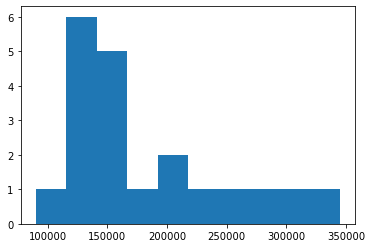

In [6]:
#plot histogram
plt.hist(train['SalePrice'])

In [7]:
#select numeric columns, select_dtypes() returns a subset of the dataframe's columns based on the column dtypes
numeric = train.select_dtypes(include=[np.number])
numeric.shape



(20, 40)

In [26]:
#calculate correlation factors and sort to get top 5 highest correlations
corr = numeric.corr()
cols = corr['SalePrice'].sort_values(ascending=False)[0:5]
colls = pd.DataFrame(corr['SalePrice'].sort_values(ascending=False))
colls

,SalePrice
SalePrice,1.000000
OverallQual,0.807380
MasVnrArea,0.788274
FullBath,0.721954
TotRmsAbvGrd,0.699634
YearBuilt,0.699627
YearRemodAdd,0.698731
GarageArea,0.696998
BedroomAbvGr,0.681291
GrLivArea,0.676909


In [18]:
# we want to 3 highest correlations and will
# pick out x cols and Y = SalePrice
cols = corr['SalePrice'].sort_values(ascending=False)[0:3].index
X = train[cols]

#assign X and Y 
Y = train['SalePrice']
X = X.drop(['SalePrice'],axis=1)

,OverallQual,MasVnrArea
0,7,196.0
1,6,0.0
2,7,162.0
3,7,0.0
4,8,350.0
5,5,0.0
6,8,186.0
7,7,240.0
8,7,0.0
9,5,0.0


In [11]:
# build Linear Regression Model
from sklearn import linear_model

lr = linear_model.LinearRegression() #instantiates the linear regression model so it can be implemented
model = lr.fit(X,Y) #fits the model according to given data
predictions = model.predict(X) # predict class labels for samples in X


NameError: name 'X' is not defined

In [22]:
# how good is the model
model.score(X,Y)  #score() returns the mean accuracy of the model as a percentage

0.7501993255220816

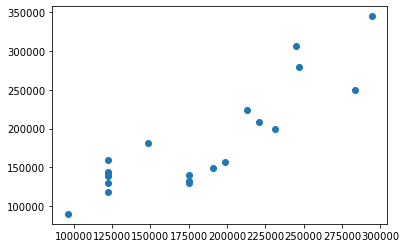

In [23]:
# Scatter plot of predictions
plt.scatter(predictions,Y)
